# Metody reprezentacji i klasyfikacji danych
_________________________________


### Projekt 

Autorzy: 
- Magdalena Jaśkiewicz 233968
- Anna Wieteska 234013
- Marcelina Matuszewska 233986


# Ogólny opis badań
_______________________________
<div style="text-align: justify">
Celem projektu jest napisanie programu potrafiącego rozpoznawanie narysowanych przez użytkownika cyfr. Przedmiotem badań jest zbiór danych pochodzący z modułu sklearn.datasets, który zawiera narzędzie do importu zestawów danych. Jest to zbiór danych ręcznie pisanych cyfr składający się z 1797 próbek. Wyodrębnić można 10 klas, są to liczby od 0 do 9. Liczebność próbek w poszczególnych klasach wynosi około 180. Każdy atrybut to intensywność jednego piksela obrazu 8 x 8. Projekt składa się z: eksploracji danych, czyszczenia danych, doboru cech i reprezentacji oraz doboru algorytmów. Dobór klasyfikatora jest oparty na porównaniu kilku algorytmów i wyborze najskuteczniejszego. W celu testowania wykorzystano bibliotekę TKinter umożlwiająca tworzenie interfejsu graficznego poprzez rysowanie własnych cyfr przez użytkownika, która umożliwi ich klasyfikację. </div>

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import potrzebnych bibliotek
import PIL
import tracemalloc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tkinter import*
from PIL import  ImageTk, ImageDraw
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import re
from sklearn.dummy import DummyClassifier

In [2]:
# Wczytywanie danych
digits = datasets.load_digits()

# Eksploracyjna analiza danych

In [3]:
#Podział danych na zmienną zależną (y) i niezależną (X)
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [4]:
#Tworzenie dataframe
df = pd.DataFrame(np.c_[digits['target'], digits['data']])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,4.490818,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,2.865304,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,9.000000,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [6]:
# Sprawdzenie liczby klas
classes = digits.target_names
print("Klasy: ", classes)
print("Liczba klas: ", len(classes))

Klasy:  [0 1 2 3 4 5 6 7 8 9]
Liczba klas:  10


In [7]:
#Liczba wszystkich próbek
n_total_samples = len(digits.images)
print("Liczba wszystkich próbek:", n_total_samples)

Liczba wszystkich próbek: 1797


In [8]:
#Liczba próbek w danej klasie
print("Liczba próbek klasy 0: ", len(X[y==0]))
print("Liczba próbek klasy 1: ", len(X[y==1]))
print("Liczba próbek klasy 2: ", len(X[y==2]))
print("Liczba próbek klasy 3: ", len(X[y==3]))
print("Liczba próbek klasy 4: ", len(X[y==4]))
print("Liczba próbek klasy 5: ", len(X[y==5]))
print("Liczba próbek klasy 6: ", len(X[y==6]))
print("Liczba próbek klasy 7: ", len(X[y==7]))
print("Liczba próbek klasy 8: ", len(X[y==8]))
print("Liczba próbek klasy 9: ", len(X[y==9]))

Liczba próbek klasy 0:  178
Liczba próbek klasy 1:  182
Liczba próbek klasy 2:  177
Liczba próbek klasy 3:  183
Liczba próbek klasy 4:  181
Liczba próbek klasy 5:  182
Liczba próbek klasy 6:  181
Liczba próbek klasy 7:  179
Liczba próbek klasy 8:  174
Liczba próbek klasy 9:  180


In [9]:
summary_of_class_quantity = df[0].value_counts()

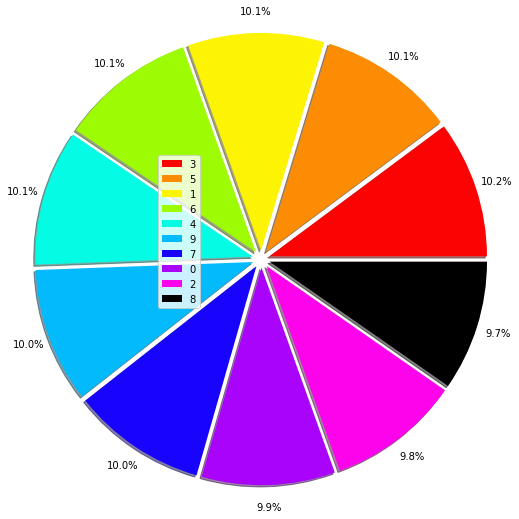

In [10]:
# Wykres kołowy procentowej zawartości próbek każdej z klas w zbiorze
pie_labels = [3, 5, 1, 6, 4, 9, 7, 0, 2, 8]
explode_pie = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
colors = ["#fc0303", "#fc8c03", "#fcf403", "#9dfc03", "#03fce3", "#03bafc", "#1803fc", "#a903fc", "#fc03eb", "#000000"]

plt.pie(summary_of_class_quantity, explode=explode_pie, labels=pie_labels, labeldistance=None, autopct='%1.1f%%', pctdistance=1.1, colors=colors, shadow=True, radius=2.5)
plt.legend()
plt.show()

<p><div style="text-align: justify"><strong>Wniosek:</strong> Ilość próbek każdej z klas jest bardzo podobna, co powinno pomóc w prawidłwej klasyfikacji.

In [11]:
#Wymiary obrazu
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


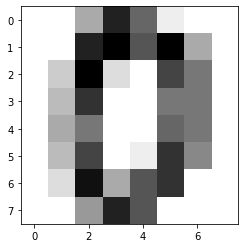

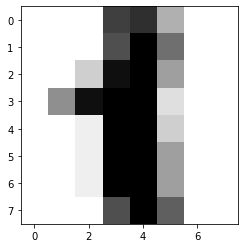

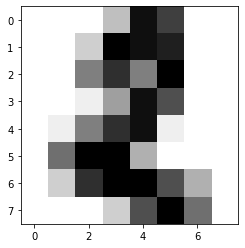

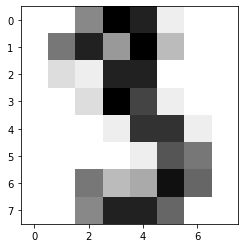

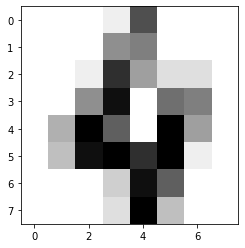

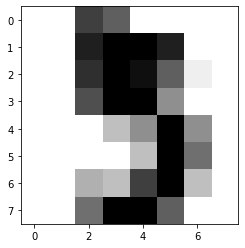

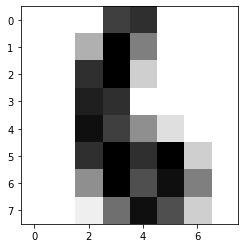

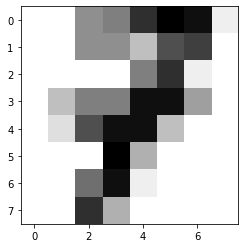

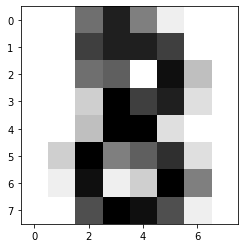

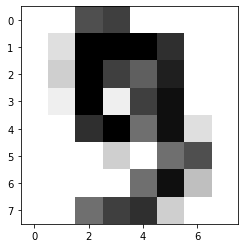

In [12]:
#Wizualizacja cyfr
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [13]:
#Tworzenie zbioru testowego i treningowego (zbiór testowy stanowi 30%) ~numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, stratify=y)

In [14]:
def normalizuj(x) :
    return (x - x.min(axis=1)[:,None]) / (x.max(axis=1)[:,None] - x.min(axis=1)[:,None] )

X_train_normalized = normalizuj(X_train)
X_test_normalized = normalizuj(X_test)

In [15]:
print(X_train_normalized.max())
print(X_test_normalized.max())

1.0
1.0


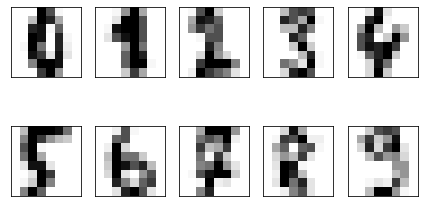

In [16]:
# Wizualizacja obrazów ze zbioru treningowego
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train_normalized[y_train == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

<p><div style="text-align: justify"><strong>Wnioski:</strong> Każdy z obrazów to kwadrat 8x8 pikseli. Dane zawarte w digits.data oznaczją intensywność piksela obrazu.

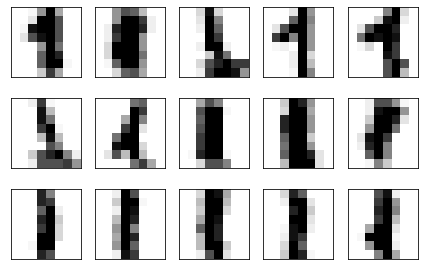

In [17]:
# Wizualizacja różnych odmian cyfry 1
fig2, ax2 = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True)
ax2 = ax2.flatten()
for i in range(15):
    img = X_train_normalized[y_train == 1][i].reshape(8, 8)
    ax2[i].imshow(img, cmap='Greys')
ax2[0].set_xticks([])
ax2[0].set_yticks([])
plt.tight_layout()

# Czyszczenie danych

In [18]:
#Zwrócenie wartości boolowskiej - sprawdzenie czy w kolumnie znajdują się jakiekolwiek brakujące wartości
missing_summary = df.isnull().values.any()  
missing_summary

False

In [19]:
# Znalezienie procentu wartości zerowych we wszystkich kolumnach 
percentage_null = df.isnull().mean() * 100 
percentage_null 

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
Length: 65, dtype: float64

Wniosek: W zbiorze nie znajdują się brakujące wartości. 

In [20]:
# Wyświetlenie przypisanego typu danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

# Dobór cech i reprezentacji

 1) 21                             0.049298
 2) 26                             0.041920
 3) 43                             0.041727
 4) 36                             0.040571
 5) 42                             0.036767
 6) 33                             0.034535
 7) 20                             0.033492
 8) 28                             0.031804
 9) 61                             0.030486
10) 13                             0.027307
11) 30                             0.027267
12) 38                             0.026071
13) 10                             0.025725
14) 29                             0.025460
15) 53                             0.025405
16) 19                             0.024844
17) 54                             0.024341
18) 34                             0.024180
19) 44                             0.024023
20) 27                             0.023010
21) 60                             0.022060
22) 51                             0.021290
23) 18                          

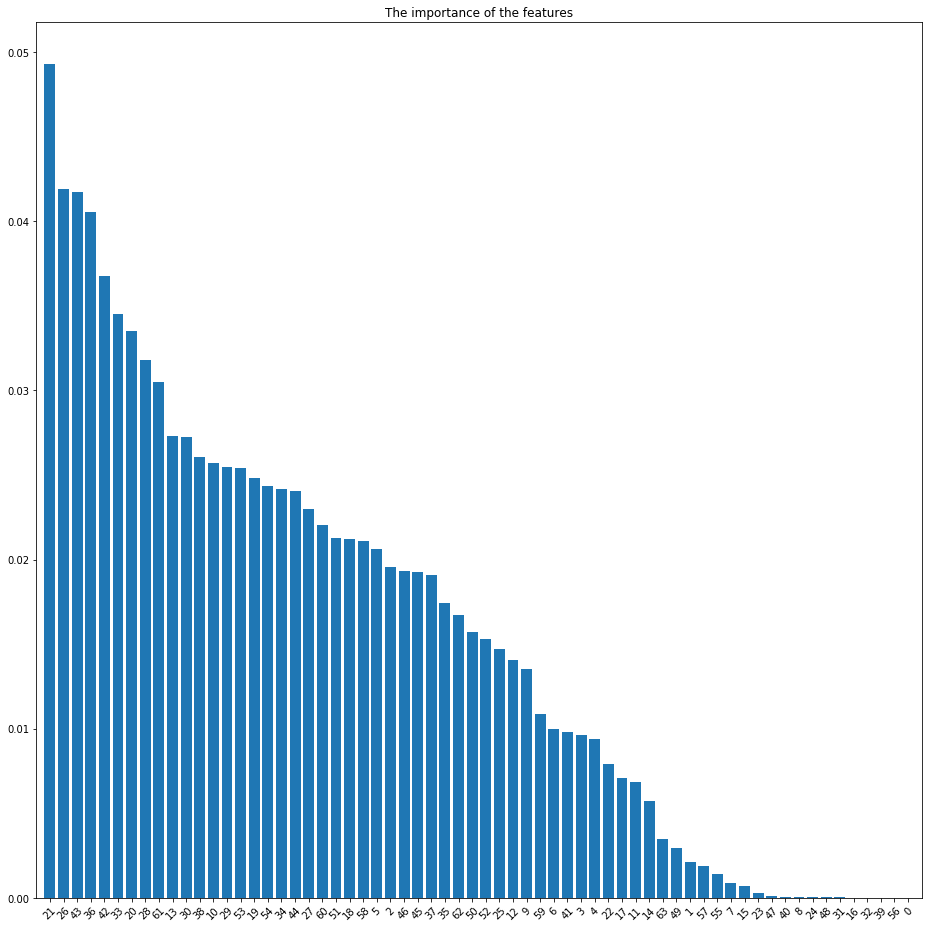

In [21]:
from sklearn.ensemble import RandomForestClassifier
labels = np.arange(64)
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_normalized, y_train)
importances = forest.feature_importances_ # informacja o istotności cech
indices = np.argsort(importances)[::-1]

for f in range(X_train_normalized.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(13,13))    
plt.title('The importance of the features')
plt.bar(range(X_train_normalized.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_normalized.shape[1]), labels[indices], rotation=45)
plt.xlim([-1, X_train_normalized.shape[1]])
plt.tight_layout()
plt.show() 

In [22]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(forest, threshold=0.02, prefit=True)
X_selected = selector.transform(X_train_normalized)
print('Number of features meeting the threshold criterion: ', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, labels[indices[f]], importances[indices[f]]))

Number of features meeting the threshold criterion:  25
 1) 21                             0.049298
 2) 26                             0.041920
 3) 43                             0.041727
 4) 36                             0.040571
 5) 42                             0.036767
 6) 33                             0.034535
 7) 20                             0.033492
 8) 28                             0.031804
 9) 61                             0.030486
10) 13                             0.027307
11) 30                             0.027267
12) 38                             0.026071
13) 10                             0.025725
14) 29                             0.025460
15) 53                             0.025405
16) 19                             0.024844
17) 54                             0.024341
18) 34                             0.024180
19) 44                             0.024023
20) 27                             0.023010
21) 60                             0.022060
22) 51              

In [23]:
print('Previous shape: ', X_train_normalized.shape)
print('New shape: ', X_selected.shape)

Previous shape:  (1257, 64)
New shape:  (1257, 25)


In [24]:
X_test_reduced = selector.transform(X_test_normalized)

# Dobór algorytmów - klasyfikacja

#### Klasyfikator SVM

In [94]:
tracemalloc.start()

SVM_classifier = SVC(kernel='linear')
SVM_classifier.fit(X_selected, y_train)

predicted_groups = SVM_classifier.predict(X_test_reduced)
print(predicted_groups[:30])
print(predicted_groups[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 8 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 8 8 5 5 4 4 9 3 2 3]
Current:0.259951MB; Peak was 0.663408MB


In [95]:
%timeit SVM_classifier = SVC(kernel='linear').fit(X_train_normalized, y_train)

25.8 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
%timeit SVM_classifier = SVC(kernel='linear').fit(X_selected, y_train)

17.7 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
print("Accuracy score for SVM classifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for SVM classifier:  0.9574074074074074 



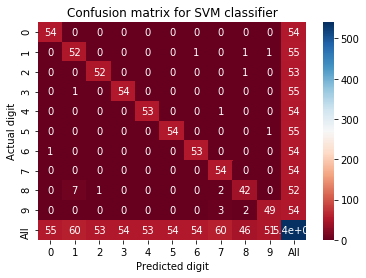

In [98]:
# Wyświetlenie macierzy pomyłek
data_SVM = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfSVM = pd.DataFrame(data_SVM, columns=['y_Actual','y_Predicted'])
confusion_matrix_SVM = pd.crosstab(dfSVM['y_Actual'], dfSVM['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt.title("Confusion matrix for SVM classifier")
sn.heatmap(confusion_matrix_SVM, annot=True, cmap = "RdBu")
plt.show()

In [25]:
#  Porównanie accuracy score dla różnych funkcji jądra
kernel_type = ['linear', 'poly', 'sigmoid', 'rbf']
 
for i in range(4):
    svclassifier = SVC(kernel=kernel_type[i]).fit(X_selected, y_train.ravel())  
    y_pred = svclassifier.predict(X_test_reduced)
    print('Accuracy score for SVM classifier with kernel function (type: {})'.format(kernel_type[i]))
    print(accuracy_score(y_test,y_pred)) 

Accuracy score for SVM classifier with kernel function (type: linear)
0.9574074074074074
Accuracy score for SVM classifier with kernel function (type: poly)
0.9703703703703703
Accuracy score for SVM classifier with kernel function (type: sigmoid)
0.7648148148148148
Accuracy score for SVM classifier with kernel function (type: rbf)
0.9777777777777777


In [26]:
# Porównanie accuracy score dla różnych wartości C

parameter_C = [1.0, 10, 100, 1000]

for i in range(4):
    svclassifier = SVC(C=parameter_C[i]).fit(X_selected, y_train.ravel())  
    y_pred = svclassifier.predict(X_test_reduced)
    print('Accuracy score for SVM classifier for C value: {}'.format(parameter_C[i]))
    print(accuracy_score(y_test,y_pred)) 

Accuracy score for SVM classifier for C value: 1.0
0.9777777777777777
Accuracy score for SVM classifier for C value: 10
0.9833333333333333
Accuracy score for SVM classifier for C value: 100
0.9833333333333333
Accuracy score for SVM classifier for C value: 1000
0.9833333333333333


In [27]:
#Wybór najlepszego zestawu hiperparametrów - klasyfikator SVM
SVM_hyperparameters = dict(kernel=kernel_type, C=parameter_C)
SVM_classifier = SVC()
SVM_search = GridSearchCV(SVM_classifier, SVM_hyperparameters, cv=5)
SVM_best_model = SVM_search.fit(X_selected, y_train)
print('Best kernel type: ', SVM_best_model.best_estimator_.get_params()['kernel'])
print('Best C: ', SVM_best_model.best_estimator_.get_params()['C'])

Best kernel type:  rbf
Best C:  10


In [28]:
SVM_choosen = SVC(C=10, kernel='rbf').fit(X_selected, y_train.ravel()) 
y_pred_SVM = SVM_choosen.predict(X_test_reduced)
print('Accuracy score for choosen SVM: ', accuracy_score(y_test,y_pred_SVM)) 

Accuracy score for choosen SVM:  0.9833333333333333


#### Klasyfikator NN

In [104]:
tracemalloc.start()

NN_classifier = KNeighborsClassifier(n_neighbors=1)
NN_classifier.fit(X_train_normalized, y_train) 
predicted_groups = NN_classifier.predict(X_test_normalized)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.245502MB; Peak was 0.261279MB


In [105]:
tracemalloc.start()

NN_classifier = KNeighborsClassifier(n_neighbors=1)
NN_classifier.fit(X_selected, y_train) 
predicted_groups = NN_classifier.predict(X_test_reduced)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.45797MB; Peak was 0.577191MB


In [106]:
%timeit NN_classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train_normalized, y_train)

15 ms ± 83.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
%timeit NN_classifier = KNeighborsClassifier(n_neighbors=1).fit(X_selected, y_train)

6.24 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [108]:
print("Accuracy score for Nearest Neighbors classifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for Nearest Neighbors classifier:  0.9814814814814815 



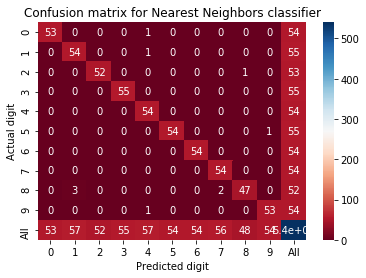

In [109]:
# Wyświetlenie macierzy pomyłek
data_NN = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfNN = pd.DataFrame(data_NN, columns=['y_Actual','y_Predicted'])
confusion_matrix_NN = pd.crosstab(dfNN['y_Actual'], dfNN['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt. title("Confusion matrix for Nearest Neighbors classifier")
sn.heatmap(confusion_matrix_NN, annot=True, cmap = "RdBu")
plt.show()

In [29]:
#Wybór najlepszego zestawu hiperparametrów - klasyfikator NN
p = [1,2] #1 - odległość Manhattan, 2 - odległość Euklidesowa

NN_hyperparameters = dict(p = p)
NN_classifier = KNeighborsClassifier(n_neighbors=1)
NN_search = GridSearchCV(NN_classifier, NN_hyperparameters, cv=5)
NN_best_model = NN_search.fit(X_selected, np.ravel(y_train))
print('Best p: ', NN_best_model.best_estimator_.get_params()['p'])

Best p:  2


In [30]:
NN_choosen = KNeighborsClassifier(n_neighbors=1, p=2).fit(X_selected, y_train.ravel()) 
y_pred_NN = NN_choosen.predict(X_test_reduced)
print('Accuracy score for choosen NN: ', accuracy_score(y_test,y_pred_NN)) 

Accuracy score for choosen NN:  0.9814814814814815


#### Klasyfikator kNN

In [112]:
tracemalloc.start()

kNN_classifier = KNeighborsClassifier(n_neighbors=5)
kNN_classifier.fit(X_train_normalized, y_train) 
predicted_groups = kNN_classifier.predict(X_test_normalized)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.243374MB; Peak was 0.328587MB


In [113]:
tracemalloc.start()

kNN_classifier = KNeighborsClassifier(n_neighbors=5)
kNN_classifier.fit(X_selected, y_train) 
predicted_groups = kNN_classifier.predict(X_test_reduced)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.457426MB; Peak was 0.628423MB


In [114]:
%timeit kNN_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train_normalized, y_train)

15 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [115]:
%timeit kNN_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_selected, y_train)

6.19 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
print("Accuracy score for k-Nearest Neighbors classifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for k-Nearest Neighbors classifier:  0.9814814814814815 



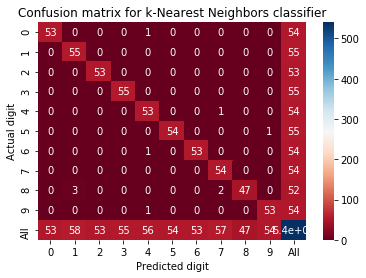

In [117]:
# Wyświetlenie macierzy pomyłek
data_KNN = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfKNN = pd.DataFrame(data_KNN, columns=['y_Actual','y_Predicted'])
confusion_matrix_KNN = pd.crosstab(dfKNN['y_Actual'], dfKNN['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt. title("Confusion matrix for k-Nearest Neighbors classifier")
sn.heatmap(confusion_matrix_KNN, annot=True, cmap = "RdBu")
plt.show()

In [31]:
# Wybór najlepszego zestawu hiperparametrów - klasyfikator kNN
p = [1,2] #1 - odległość Manhattan, 2 - odległość Euklidesowa
n_neighbors = list(range(2,40))

kNN_hyperparameters = dict(n_neighbors=n_neighbors, p=p)
kNN_classifier = KNeighborsClassifier()
kNN_search = GridSearchCV(kNN_classifier, kNN_hyperparameters, cv=5)
kNN_best_model = kNN_search.fit(X_selected, np.ravel(y_train))
print('Best n_neighbors: ', kNN_best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p : ', kNN_best_model.best_estimator_.get_params()['p'])

Best n_neighbors:  3
Best p :  2


Text(0, 0.5, 'Accuracy')

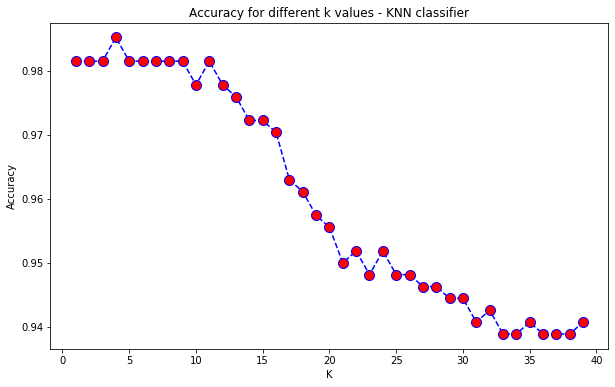

In [32]:
# Wybór optymalnej wartości k 
accuracy = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, p=2).fit(X_selected ,y_train)
    yhat = neigh.predict(X_test_reduced)
    accuracy.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy for different k values - KNN classifier')
plt.xlabel('K')
plt.ylabel('Accuracy') ## k = 5

In [33]:
kNN_choosen = KNeighborsClassifier(n_neighbors=3, p=2).fit(X_selected, y_train.ravel()) 
y_pred_kNN = kNN_choosen.predict(X_test_reduced)
print('Accuracy score for choosen kNN: ', accuracy_score(y_test,y_pred_kNN)) 

Accuracy score for choosen kNN:  0.9814814814814815


#### Klasyfikator NearestCentroid

In [34]:
tracemalloc.start()

NM_classifier = NearestCentroid()
NM_classifier.fit(X_selected, y_train) 
predicted_groups = NM_classifier.predict(X_test_reduced)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 9 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.165421MB; Peak was 0.25257MB


In [35]:
tracemalloc.start()

NM_classifier = NearestCentroid()
NM_classifier.fit(X_train_normalized, y_train) 
predicted_groups = NM_classifier.predict(X_test_normalized)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[2 3 1 5 0 6 6 7 4 9 3 9 7 7 6 2 9 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.159557MB; Peak was 0.298602MB


In [36]:
%timeit NM_classifier = NearestCentroid().fit(X_train_normalized, y_train)

1.13 ms ± 79.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%timeit NM_classifier = NearestCentroid().fit(X_selected, y_train)

714 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
print("Accuracy score for Nearest Centroid classifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for Nearest Centroid classifier:  0.8722222222222222 



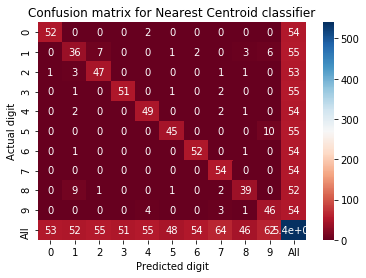

In [39]:
# Wyświetlenie macierzy pomyłek
data_NM = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfNM = pd.DataFrame(data_NM, columns=['y_Actual','y_Predicted'])
confusion_matrix_NM = pd.crosstab(dfNM['y_Actual'], dfNM['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt. title("Confusion matrix for Nearest Centroid classifier")
sn.heatmap(confusion_matrix_NM, annot=True, cmap = "RdBu")
plt.show()

In [40]:
# Wybór najlepszego zestawu hiperparametrów - klasyfikator NM
NM_distances = ['euclidean', 'manhattan']

NM_hyperparameters = dict(metric = NM_distances)
NM_classifier = NearestCentroid()
NM_search = GridSearchCV(NM_classifier, NM_hyperparameters, cv=4)
NM_best_model = NM_search.fit(X_selected, np.ravel(y_train))
print('Best metric: ', NM_best_model.best_estimator_.get_params()['metric'])

Best metric:  euclidean


In [41]:
NM_choosen = NearestCentroid(metric='euclidean').fit(X_train_normalized, y_train.ravel()) 
y_pred_NM = NM_choosen.predict(X_test_normalized)
print('Accuracy score for choosen NM: ', accuracy_score(y_test,y_pred_NM)) 

Accuracy score for choosen NM:  0.8722222222222222


In [42]:
NM_choosen = NearestCentroid(metric='euclidean').fit(X_selected, y_train.ravel()) 
y_pred_NM = NM_choosen.predict(X_test_reduced)
print('Accuracy score for choosen NM: ', accuracy_score(y_test,y_pred_NM)) 

Accuracy score for choosen NM:  0.8814814814814815


#### Klasyfikator za pomocą regresji logistycznej

In [133]:
tracemalloc.start()

LR_classifier = LogisticRegression(max_iter=10000)
LR_classifier.fit(X_selected, y_train) 
predicted_groups = LR_classifier.predict(X_test_reduced)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.170021MB; Peak was 0.93225MB


In [134]:
tracemalloc.start()

LR_classifier = LogisticRegression(max_iter=10000)
LR_classifier.fit(X_train_normalized, y_train) 
predicted_groups = LR_classifier.predict(X_test_normalized)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.189647MB; Peak was 0.807364MB


In [135]:
%timeit LR_classifier = LogisticRegression(max_iter=10000).fit(X_train_normalized, y_train)

199 ms ± 24.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [136]:
%timeit LR_classifier = LogisticRegression(max_iter=10000).fit(X_selected, y_train)

122 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [137]:
print("Accuracy score for Logistic Regression classifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for Logistic Regression classifier:  0.9629629629629629 



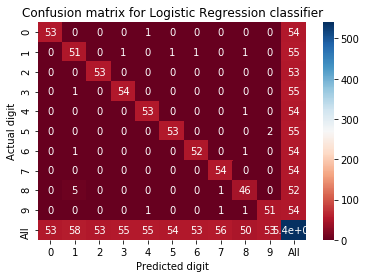

In [138]:
# Wyświetlenie macierzy pomyłek
data_LR = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfLR = pd.DataFrame(data_LR, columns=['y_Actual','y_Predicted'])
confusion_matrix_LR = pd.crosstab(dfLR['y_Actual'], dfLR['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt. title("Confusion matrix for Logistic Regression classifier")
sn.heatmap(confusion_matrix_LR, annot=True, cmap = "RdBu")
plt.show()

In [43]:
# Wybór najlepszego zestawu hiperparametrów - regresja logistyczna
C = [1, 10, 100, 1000]

LR_hyperparameters = dict(C=C)
LR_classifier = LogisticRegression(max_iter=1000)
LR_search = GridSearchCV(LR_classifier, LR_hyperparameters, cv=4)
LR_best_model = LR_search.fit(X_selected, np.ravel(y_train))
print('Best C: ', LR_best_model.best_estimator_.get_params()['C'])

Best C:  1


In [44]:
LR_choosen = LogisticRegression(max_iter=1000, C=1).fit(X_selected, y_train.ravel()) 
y_pred_LR = LR_choosen.predict(X_test_reduced)
print('Accuracy score for choosen LR: ', accuracy_score(y_test,y_pred_LR)) 

Accuracy score for choosen LR:  0.9462962962962963


#### DummyClassifier

In [141]:
tracemalloc.start()

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train_normalized, y_train) 
predicted_groups = dummy_classifier.predict(X_test_normalized)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.15444MB; Peak was 0.199336MB


In [142]:
tracemalloc.start()

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_selected, y_train) 
predicted_groups = dummy_classifier.predict(X_test_reduced)

print(predicted_groups[:30])
print(y_test[:30])

current, peak = tracemalloc.get_traced_memory()
print(f"Current:{current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 3 1 5 0 6 6 7 4 9 3 9 7 7 6 1 5 7 3 3 9 8 5 5 4 4 9 3 2 3]
Current:0.153527MB; Peak was 0.199192MB


In [143]:
%timeit dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_train_normalized, y_train)

150 µs ± 601 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [144]:
%timeit dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_selected, y_train)

151 µs ± 649 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [145]:
print("Accuracy score for DummyClassifier: ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_groups), "\n")

Accuracy score for DummyClassifier:  0.10185185185185185 



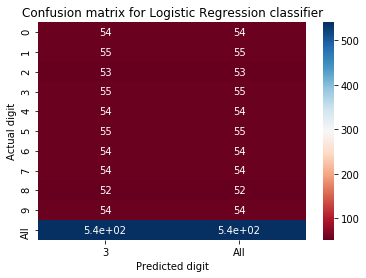

In [146]:
# Wyświetlenie macierzy pomyłek
data_DC = {'y_Actual': y_test, 'y_Predicted': predicted_groups}
dfDC = pd.DataFrame(data_DC, columns=['y_Actual','y_Predicted'])
confusion_matrix_DC = pd.crosstab(dfDC['y_Actual'], dfDC['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = True)
plt. title("Confusion matrix for Logistic Regression classifier")
sn.heatmap(confusion_matrix_DC, annot=True, cmap = "RdBu")
plt.show()

In [45]:
dummy_strategy = ['stratified', 'most_frequent', 'uniform']
random_state = [0, 42]
dummy_parameters = dict(strategy=dummy_strategy, random_state = random_state)
dummy_cls = DummyClassifier()
dummy_search = GridSearchCV(dummy_cls, dummy_parameters, cv=5)
dummy_best_model = dummy_search.fit(X_selected, np.ravel(y_train))
print('Best strategy: ', dummy_best_model.best_estimator_.get_params()['strategy'])
print('Best random state: ', dummy_best_model.best_estimator_.get_params()['random_state'])

Best strategy:  most_frequent
Best random state:  0


In [46]:
dummy_choosen = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_selected, y_train.ravel()) 
y_pred_dummy = dummy_choosen.predict(X_test_reduced)
print('Accuracy score for choosen DummyClassifier: ', accuracy_score(y_test,y_pred_dummy)) 

Accuracy score for choosen DummyClassifier:  0.10185185185185185


In [149]:
# Interfejs użytkownika umożliwiający wprowadzenie własnych przykładów testowych

In [47]:
width = 50
height = 50
my_labels = []
       
def save():
    if re.match(r'^\d{1}$', entry.get()):
    
        global image_number
        filename = f'image_{image_number}.png'
        image1.save(filename)
        my_labels.append(entry.get())
        image_number+=1
   
def activate_paint(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = event.x, event.y

def paint(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=3)
    draw.line((lastx, lasty, x, y), fill='black', width=3)
    lastx, lasty = x, y
    
def clear():
    cv.delete('all')
    draw.rectangle((0, 0, 50, 50), fill="white")
    
window = Tk()
window.title("Painting digit")
lastx, lasty = None, None
image_number = 0

cv = Canvas(window, width=width, height=height, bg="white")
cv.grid(row=0,column=0)

image1 = PIL.Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image1)

cv.bind("<1>", activate_paint)

message = Label(window, text = "Press and drag the mouse to draw.\n Draw in white rectangle \n then write label of digit and click save." )
message.grid(column=0,row=1)

entry = Entry(window)
entry.grid(column=0, row=2)


save_button = Button(text="Save", command=save)
save_button.grid(column=0,row=3)
clear_button = Button(text="New canva", command=clear)
clear_button.grid(column=0, row=4)
window.mainloop()

In [48]:
my_labels

['0', '0', '1', '1', '2', '2', '3']

In [49]:
size = 8, 8
my_img_dataset = []
my_data_dataset = []
for i in range(image_number):
    opened_image = PIL.Image.open(f'image_{i}.png')
    resized_image = opened_image.resize(size, PIL.Image.ANTIALIAS)
    resized_image.save(f'resized_image_{i}.png', "PNG")
    my_img_dataset.append(np.array(plt.imread(f'resized_image_{i}.png')))
    my_data_dataset.append(np.ravel(my_img_dataset[i][:,:,0]))

In [51]:
#wszystkie wartości zawierają się w przedziale [0,1] - normalizacja nie jest potrzebna
print('Min: ', (my_img_dataset[0][:,:,0]).min())
print('Max: ', (my_img_dataset[0][:,:,0]).max())

Min:  0.4627451
Max:  1.0


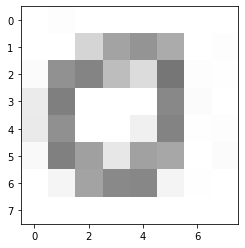

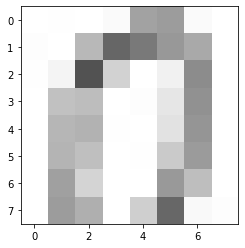

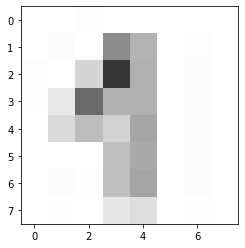

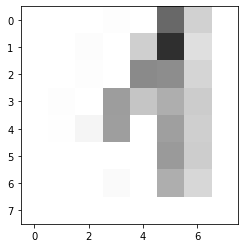

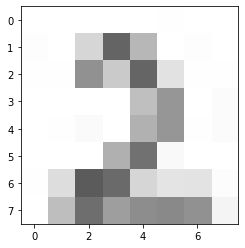

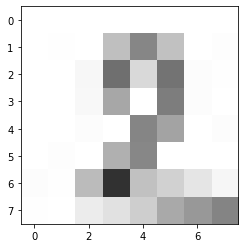

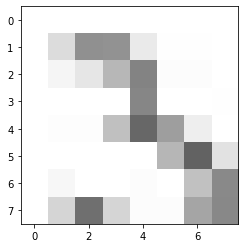

In [52]:
for i in range(image_number):
    plt.imshow(my_img_dataset[i], cmap='gray')
    plt.show()

In [53]:
np_my_labels = np.array(my_labels, dtype='int64')
np_my_dataset = selector.transform(1-np.array(my_data_dataset))

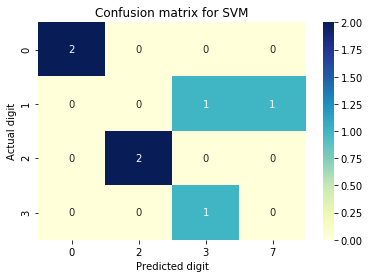

Accuracy:  0.7142857142857143


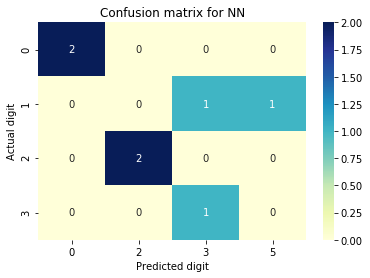

Accuracy:  0.7142857142857143


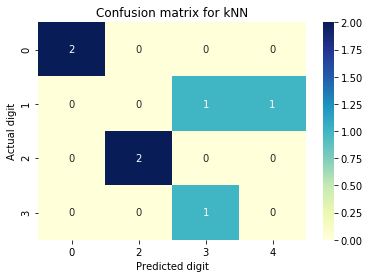

Accuracy:  0.7142857142857143


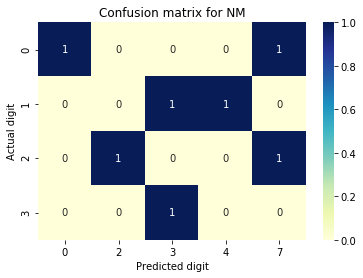

Accuracy:  0.42857142857142855


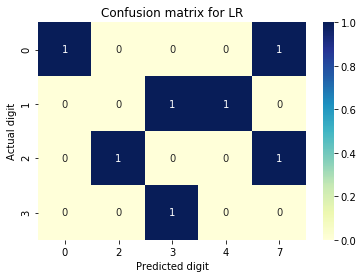

Accuracy:  0.42857142857142855


In [54]:
# Sprawdzenie poprawności klasyfikacji przez każdy z klasyfikatorów
cm_options = [("Macierz pomyłek dla klasyfikatora SVM", SVM_choosen, 'SVM'), 
              ("Macierz pomyłek dla klasyfikatora NN", NN_choosen, 'NN'), 
              ("Macierz pomyłek dla klasyfikatora kNN", kNN_choosen, 'kNN'), 
              ("Macierz pomyłek dla klasyfikatora NM", NM_choosen, 'NM'), 
              ("Macierz pomyłek dla klasyfikacji przy pomocy regresji logistycznej", LR_choosen, 'LR')]

for title, classifier, clf_name in cm_options:
    predicted = classifier.predict(np_my_dataset)
    data = {'y_Actual': np_my_labels, 'y_Predicted': predicted}
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual digit'], colnames=['Predicted digit'], margins = False)
    plt.title(f'Confusion matrix for {clf_name}')
    sn.heatmap(confusion_matrix, annot=True, cmap = "YlGnBu")
    plt.show()
    print("Accuracy: ", accuracy_score(np_my_labels, classifier.predict(np_my_dataset)))


# Wnioski i podsumowanie
_______________________________
<div style="text-align: justify">
Eksploracyjna analiza danych umożliwiła uzyskanie dogłębnej wiedzy na temat wybranego zbioru ręcznie pisanych cyfr, który składa się z 10 klas, 1797 próbek i 65 cech. Liczba próbek każdej z klas jest zbliżona - około 180.  Zwizualizowano obrazy cyfr ze zbioru treningowego oraz przykładowo różne odmiany cyfry 1. Następnie sprawdzono przypisany typ danych – float64 oraz wykazano, że zbiorze nie znajdują się wartości brakujące. Korzystając z algorytmu losowego lasu pochodzącego z pakietu sklearn – RandomForestClassifier oceniono istotność cech, wynik został zilustrowany na wykresie słupkowym. Następnie poprzez ustawienie wartości progowej ograniczono ich ilość, pozostawiając ostatecznie 25 cech. Dobór klasyfikatora był oparty o porównanie kilku algorytmów pod względem zużycia pamięci, czasu wykonania, dokładności oraz analizy macierzy pomyłek, któremu towarzyszyła pełna automatyczna optymalizacja hiperparametrów w celu późniejszego wyboru  najskuteczniejszego algorytmu.  Zweryfikowano słuszność selekcji cech poprzez porównanie wyników na zbiorze treningowych (64 cechy), jak i na ograniczonym do 25 cech.
Poniżej zamieszczono porównanie wyników wybranych metryk na zbiorach z uwzględnieniem selekcji cech. </div>
    
Klasyfikator SVM

-  zużycie pamięci: 

Bieżący przydział pamięci (Current) wynosi: 0.272031 MB

Szczytowy przydział pamięci (Peak) wynosi 0.671344 MB

- czas:  18.3 ms ± 937 µs per loop

- dokładność: 98.33 %

- najlepszy zestaw hiperparametrów: funkcja jądra: rbf, wartość parametru C: 10. 
    
Klasyfikator NN

-  zużycie pamięci: 

Bieżący przydział pamięci (Current) wynosi: 0.514717 MB

Szczytowy przydział pamięci (Peak) wynosi  0.638763 MB

- czas: 8.24 ms ± 961 µs per loop 

- dokładność: 98.15 %

- najlepszy zestaw hiperparametrów: odległość Euklidesowa. 
    
Klasyfikator kNN
-  zużycie pamięci: 

Bieżący przydział pamięci (Current) wynosi: 0.458274 MB

Szczytowy przydział pamięci (Peak) wynosi  0.629311 MB

- czas:  8.73 ms ± 1.06 ms per loop 

- dokładność: 98.15%

- najlepszy zestaw hiperparametrów: odległość Euklidesowa, liczba sąsiadów: 3
    
Dodatkowo zwizualizowano dokładność klasyfikatora pod względem rożnych wartości k – liczby sąsiadów.

Klasyfikator NM

-  zużycie pamięci: 

Bieżący przydział pamięci (Current) wynosi: 0.156315 MB

Szczytowy przydział pamięci (Peak) wynosi  0.24392 MB

- czas:  846 µs ± 94.6 µs per loop 

- dokładność: 88.15 %

- najlepszy zestaw hiperparametrów: odległość Euklidesowa
    
Klasyfikator za pomocą regresji logistycznej

-  zużycie pamięci: 

Bieżący przydział pamięci (Current) wynosi: 0.016063 MB

Szczytowy przydział pamięci (Peak) wynosi  0.923472 MB

- czas: 248 ms ± 93.9 ms per loop

- dokładność: 94.62%

- najlepszy zestaw hiperparametrów: parametr C: 1.

DummyClassifer

- zużycie pamięci:

Bieżący przydział pamięci (Current) wynosi: 0.007744MB

Szczytowy przydział pamięci (Peak) wynosi: 0.05124MB

- czas: 177 µs ± 815 ns per loop

- dokładność: 10.19%

- najlepszy zestaw hiperparametrów: strategia: most-frequent, random state: 0
    
<div style="text-align: justify">
Metoda najbliższego sąsiada wyróżnia się największym zużyciem pamięci, co wynika z dużej złożoności obliczeniowej procesu klasyfikacji oraz z tego, iż wymagane są duże zasoby do przechowywania wzorca. Klasyfikator najbliższego sąsiada intensywnie korzysta z pamięci, ponieważ zapamiętuje cały zbiór treningowy (wymagane większe zasoby pamięci do przechowywania danych treningowych) i używa ich do klasyfikacji, czego efektem jest wolniejsza i bardziej kosztowna faza testowania. Klasyfikator najbliższej średniej oraz z wykorzystaniem regresji logistycznej natomiast wyróżnia mniejsze zużycie pamięci wynikające z  prostoty obliczeniowej oraz małych zasobów niezbędnych do przechowywania wzorców. Zaobserwować można, że algorytmy wyróżniające się wyższą dokładnością cechuje dłuższy czas operacji (np. klasyfikator SVM: 98.33% - 18.3 ms, klasyfikator NM: 88.15% - 846 µs). Najmniejszym zużyciem pamięci i czasu, a także najmniejszą dokładnością wykazał się DummyClassifier, który przydzielał wszystkie próbki do najliczniejszej klasy.</div>
<div style="text-align: justify">
Ostateczny wybór to klasyfikator SVM, który wyróżnia najwyższa dokładność, co w przypadku projektów opartych o rozpoznawanie obiektów (cyfr) odgrywa kluczową rolę. Funkcja jądra (RBF) radialna oblicza linię podziału w wyższym wymiarze, co umożliwia pracę na tak złożonym i zróżnicowanym zbiorze danych (baza cyfr rysowanych ręcznie od dużej grupy ludzi). 
Ostatnim etapem było wykonanie prób testowych w oparciu o opracowany interfejs graficzny poprzez rysowanie własnych cyfr przez użytkownika.  </div>
<div style="text-align: justify"> 
Interpretacja wyników wybranych metryk: accuracy score i confusion matrix jest skomplikowana, ponieważ ma na nią wpływ kilka istotnych czynników. Cyfry nie zawsze mają ten sam rozmiar, szerokość, orientację nawet pisane ponownie przez tego samego użytkownika. Każda osoba ma inny indywidualny charakter pisma, ale wpływ na to ma m.in. pochodzenie. Zbiór ten jest różnorodny, ale przy tym ciężki do odwzorowania (zbliżenia się do znajdujących się w nim obiektów). Kolejnym aspektem jest to, że cyfry te są rysowane pośrednictwem myszki, co niestety nie jest precyzyjnym procesem. Brak dokładnych informacji na temat sposobu przetwarzania obrazów znajdujących się w zbiorze oraz brak pewności czy ciemniejsze piksele oznaczają miejsce, w których długopis był przyciśnięty do kartki, jeśli tak taka opcja jest niemożliwa przy użyciu myszki.</div></p>